# <center> Projeto 01 - Unidade II </center>

Seja o sistema dinâmico dado pela seguinte função não linear:

$$ 
y[n] = f\left(y[n - 1],\, y[n - 2],\, u[n],\, u[n - 1]\right)
$$

cujo conjunto entrada / saídas é apresentado na tabela *dados.txt*. Implemente um identificador via **Método dos Mínimos Quadrados** e a **combinação linear de funções de base radial - RBF**. 

No projeto utilize:
* 500 amostras para o treinamento
* 500 amostras para o teste e,
* 500 amostras para validar o modelo.

Compare os resultados obtidos utilizando como métricas o **Erro Médio Quadrático** e o **Coeficiente de Correlação de Pearson** (ver Lab 04). Apresente conclusões.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from numpy.linalg import pinv
from scipy.stats import linregress, pearsonr
from scipy.signal import butter, lfilter, filtfilt

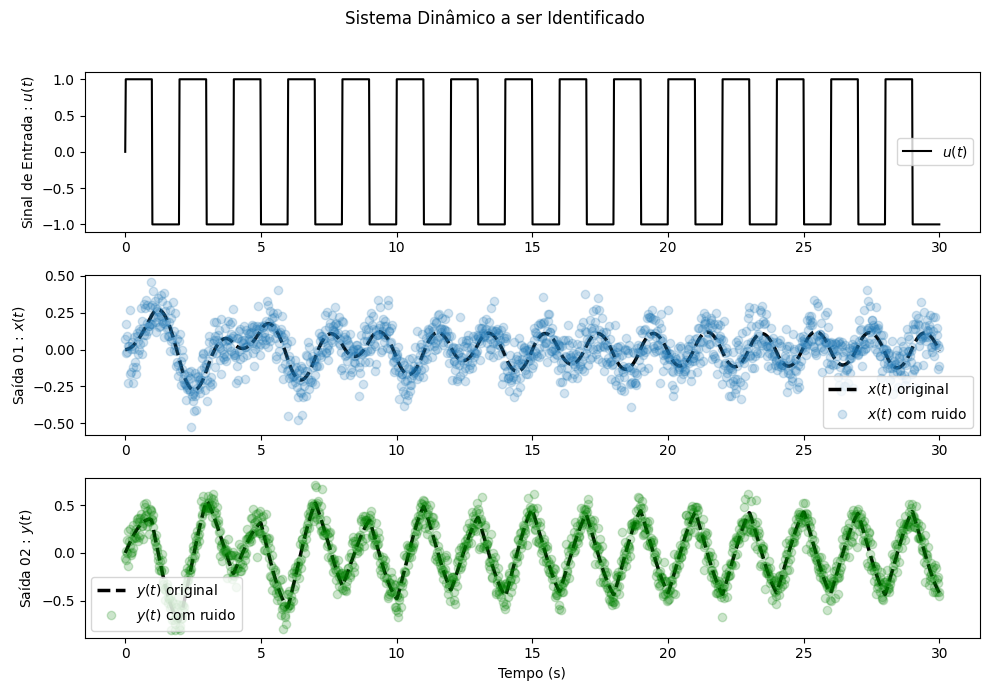

In [26]:
data = np.loadtxt('dados.txt', delimiter=',', skiprows=1)

t = data[:, 0] #tempo
u = data[:, 1] #entrada

x = data[:, 2] #saida c/ ruido (utilizar para treinar)
y = data[:, 3] #saida c/ ruido (utilizar para treinar)

x1 = data[:, 4] #saida s/ ruido
y1 = data[:, 5] #saida s/ ruido

# Plot results of simulation
plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.plot(t, u, label='$u(t)$', color='k')
plt.ylabel('Sinal de Entrada : $u(t)$')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, x1, '--k', lw = 2.5, label='$x(t)$ original')
plt.plot(t, x, 'o', alpha = 0.2, label='$x(t)$ com ruido')
plt.ylabel('Saída 01 : $x(t)$')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, y1, '--k', lw = 2.5, label='$y(t)$ original')
plt.plot(t, y, 'og', alpha=0.2, label='$y(t)$ com ruido')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 02 : $y(t)$')
plt.legend()

plt.suptitle('Sistema Dinâmico a ser Identificado')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [43]:
t = data[2:, 0] #tempo
u = data[2:, 1] #entrada
U1 = data[1:-1, 1] #u[n-1] 

y = data[2:, 3] #saida
Y1 = data[1:-1, 3] #y[n-1]
Y2 = data[:-2, 3] #y[n-2]

x = data[2:, 2] #saida
X1 = data[1:-1, 2] #x[n-1]
X2 = data[:-2, 2] #x[n-2]

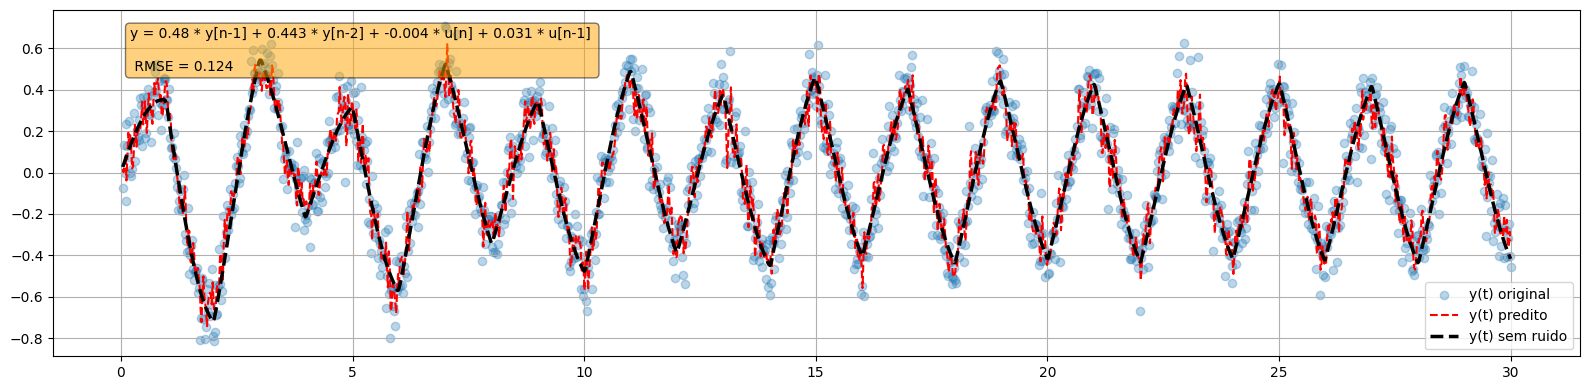

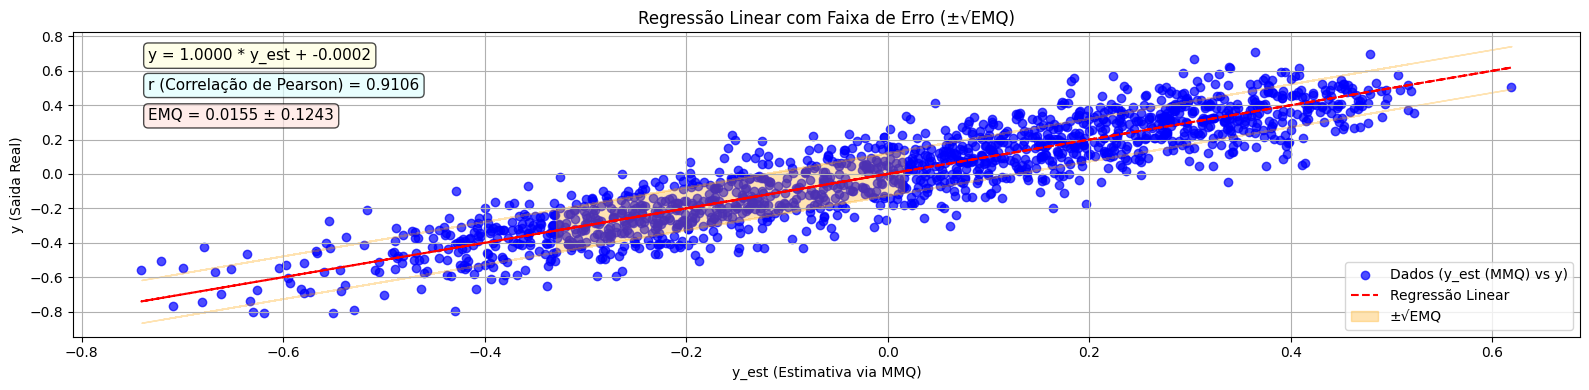

In [28]:
#Ajustando para y via MMQ
Y_MMQ = np.column_stack((Y1, Y2, u, U1))

w = la.pinv(Y_MMQ) @ y
y_est_mmq = Y_MMQ @ w

EMQY_MMQ = np.mean((y - y_est_mmq) ** 2)
RMSEY_MMQ = np.sqrt(np.mean((y_est_mmq - y) ** 2))

modelo = (f"y = {w[0]:.2f} * y[n-1] + {w[1]:.3f} * y[n-2] + {w[2]:.3f} * u[n] + {w[3]:.3f} * u[n-1] \n\n RMSE = {RMSEY_MMQ:.3f}")

plt.figure(figsize=(16,4))
plt.scatter(t, y, alpha = 0.3, label = "y(t) original")
plt.plot(t, y_est_mmq,'--r', label = "y(t) predito")
plt.plot(t, y1[2:], '--k', lw = 2.5, label = "y(t) sem ruido")
plt.grid()
plt.legend()
plt.gca().text(0.05, 0.95, modelo, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))
plt.tight_layout()
plt.show()

#Calculando correlacao de pearson

a, b, r_val, p_val, std_err = linregress(y_est_mmq, y)
corr_y_mmq, _ = pearsonr(y_est_mmq, y)
y_reg = a * y_est_mmq + b

plt.figure(figsize=(16, 4))
plt.scatter(y_est_mmq, y, alpha = 0.7, label = 'Dados (y_est (MMQ) vs y)', color = 'blue')
plt.plot(y_est_mmq, y_reg, '--r', label = 'Regressão Linear')

plt.fill_between(y_est_mmq, y_reg - RMSEY_MMQ, y_reg + RMSEY_MMQ, color = 'orange', alpha = 0.3, label = '±√EMQ')

reg_eq = f"y = {a:.4f} * y_est + {b:.4f}"
corr_text = f"r (Correlação de Pearson) = {corr_y_mmq:.4f}"
emq_text = f"EMQ = {EMQY_MMQ:.4f} ± {RMSEY_MMQ:.4f}"

plt.text(0.05, 0.95, reg_eq, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightyellow', alpha = 0.7))

plt.text(0.05, 0.85, corr_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightcyan', alpha = 0.7))

plt.text(0.05, 0.75, emq_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'mistyrose', alpha = 0.7))

plt.xlabel("y_est (Estimativa via MMQ)")
plt.ylabel("y (Saida Real)")
plt.title("Regressão Linear com Faixa de Erro (±√EMQ)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


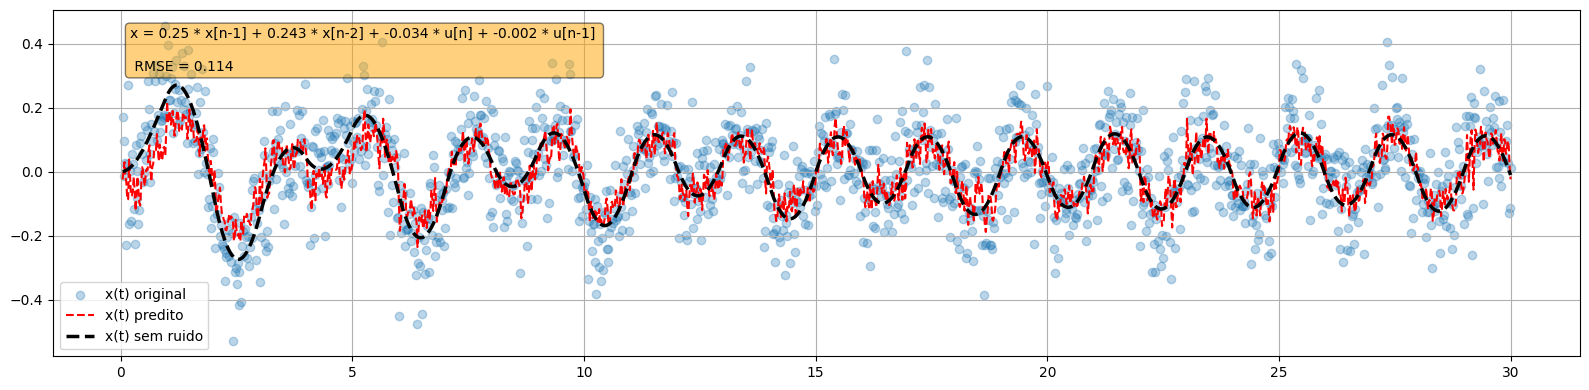

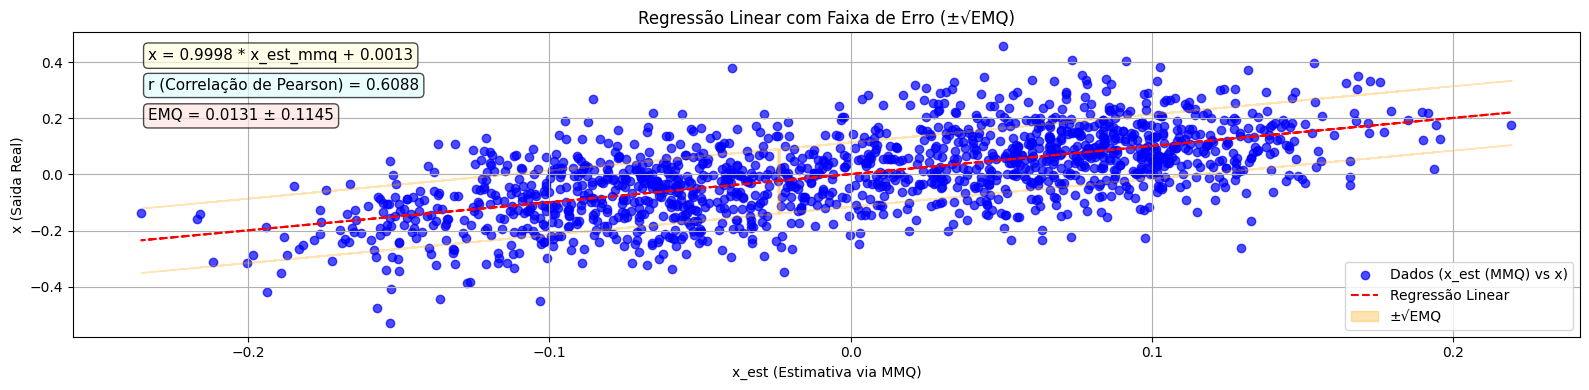

In [29]:
#Ajustando para x via MMQ
X_MMQ = np.column_stack((X1, X2, u, U1))

w = la.pinv(X_MMQ) @ x
x_est_mmq = X_MMQ @ w

EMQX_MMQ = np.mean((x - x_est_mmq) ** 2)
RMSEX_MMQ = np.sqrt(np.mean((x_est_mmq - x) ** 2))

modelo = (f"x = {w[0]:.2f} * x[n-1] + {w[1]:.3f} * x[n-2] + {w[2]:.3f} * u[n] + {w[3]:.3f} * u[n-1] \n\n RMSE = {RMSEX_MMQ:.3f}")

plt.figure(figsize=(16,4))
plt.scatter(t, x, alpha = 0.3, label = "x(t) original")
plt.plot(t, x_est_mmq,'--r', label = "x(t) predito")
plt.plot(t, x1[2:], '--k', lw = 2.5, label = "x(t) sem ruido")
plt.grid()
plt.legend()
plt.gca().text(0.05, 0.95, modelo, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))

plt.tight_layout()
plt.show()
  
a, b, r_val, p_val, std_err = linregress(x_est_mmq, x)
corr_x_mmq, _ = pearsonr(x_est_mmq, x)
x_reg = a * x_est_mmq + b

plt.figure(figsize=(16, 4))
plt.scatter(x_est_mmq, x, alpha = 0.7, label = 'Dados (x_est (MMQ) vs x)', color = 'blue')
plt.plot(x_est_mmq, x_reg, '--r', label = 'Regressão Linear')

plt.fill_between(x_est_mmq, x_reg - RMSEX_MMQ, x_reg + RMSEX_MMQ, color = 'orange', alpha = 0.3, label = '±√EMQ')

reg_eq = f"x = {a:.4f} * x_est_mmq + {b:.4f}"
corr_text = f"r (Correlação de Pearson) = {corr_x_mmq:.4f}"
emq_text = f"EMQ = {EMQX_MMQ:.4f} ± {RMSEX_MMQ:.4f}"

plt.text(0.05, 0.95, reg_eq, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightyellow', alpha = 0.7))

plt.text(0.05, 0.85, corr_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightcyan', alpha = 0.7))

plt.text(0.05, 0.75, emq_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'mistyrose', alpha = 0.7))

plt.xlabel("x_est (Estimativa via MMQ)")
plt.ylabel("x (Saida Real)")
plt.title("Regressão Linear com Faixa de Erro (±√EMQ)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


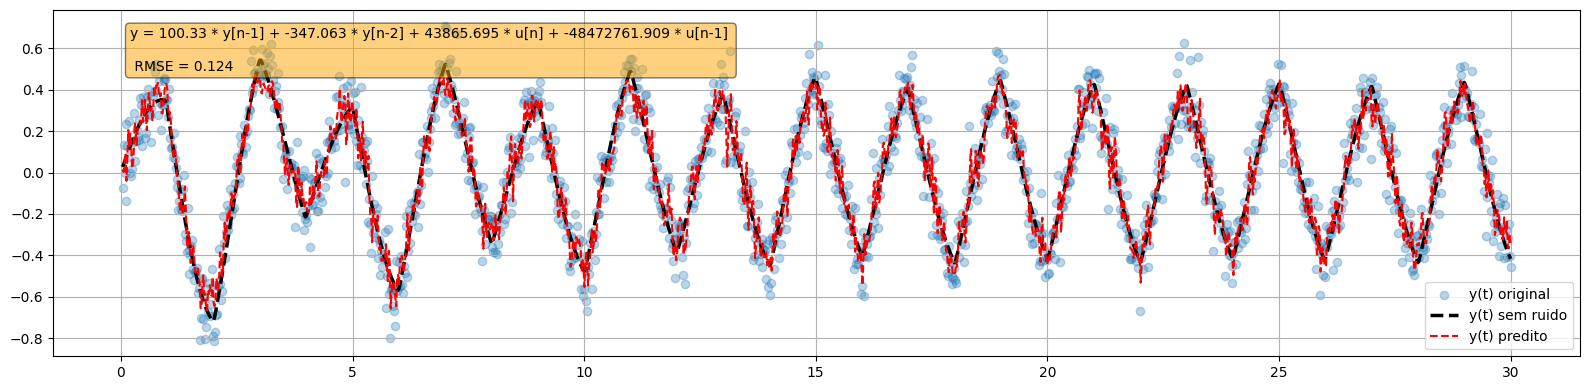

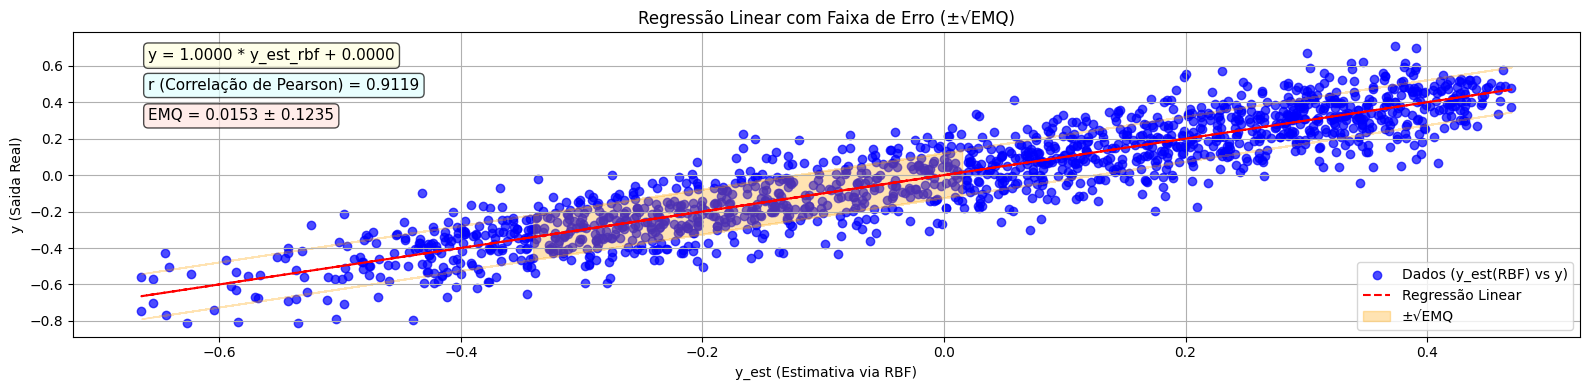

In [49]:
#Ajustando para y via RBF
#y[n] = w0 * g(y[n-1]) + w1 * g(y[n-2]) + w2 * g(u[n]) + w3 * g(u[n-1])

c = np.linspace(t[0], t[-1], 4)
s2 = 15

phi_Y1 = np.exp(-((Y1[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_Y2 = np.exp(-((Y2[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_u = np.exp(-((u[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_U1 = np.exp(-((U1[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))

Y_RBF = np.column_stack((phi_Y1, phi_Y2, phi_u, phi_U1))

w = la.pinv(Y_RBF) @ y

y_est_rbf = Y_RBF @ w

EMQY_RBF = np.mean((y - y_est_rbf) ** 2)
RMSEY_RBF = np.sqrt(np.mean((y_est_rbf - y) ** 2))

modelo = (f"y = {w[0]:.2f} * y[n-1] + {w[1]:.3f} * y[n-2] + {w[2]:.3f} * u[n] + {w[3]:.3f} * u[n-1] \n\n RMSE = {RMSEY_RBF:.3f}")

plt.figure(figsize=(16,4))
plt.scatter(t, y, alpha = 0.3, label = "y(t) original")
plt.plot(t, y1[2:], '--k', lw = 2.5, label = "y(t) sem ruido")
plt.plot(t, y_est_rbf,'--r', label = "y(t) predito")
plt.grid()
plt.legend()
plt.gca().text(0.05, 0.95, modelo, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))
plt.tight_layout()
plt.show()

#Calculando correlacao de pearson

a, b, r_val, p_val, std_err = linregress(y_est_rbf, y)
corr_y_rbf, _ = pearsonr(y_est_rbf, y)
y_reg = a * y_est_rbf + b

plt.figure(figsize=(16, 4))
plt.scatter(y_est_rbf, y, alpha = 0.7, label = 'Dados (y_est(RBF) vs y)', color = 'blue')
plt.plot(y_est_rbf, y_reg, '--r', label = 'Regressão Linear')

plt.fill_between(y_est_rbf, y_reg - RMSEY_RBF, y_reg + RMSEY_RBF, color = 'orange', alpha = 0.3, label = '±√EMQ')

reg_eq = f"y = {a:.4f} * y_est_rbf + {b:.4f}"
corr_text = f"r (Correlação de Pearson) = {corr_y_rbf:.4f}"
emq_text = f"EMQ = {EMQY_RBF:.4f} ± {RMSEY_RBF:.4f}"

plt.text(0.05, 0.95, reg_eq, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightyellow', alpha = 0.7))

plt.text(0.05, 0.85, corr_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightcyan', alpha = 0.7))

plt.text(0.05, 0.75, emq_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'mistyrose', alpha = 0.7))

plt.xlabel("y_est (Estimativa via RBF)")
plt.ylabel("y (Saida Real)")
plt.title("Regressão Linear com Faixa de Erro (±√EMQ)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


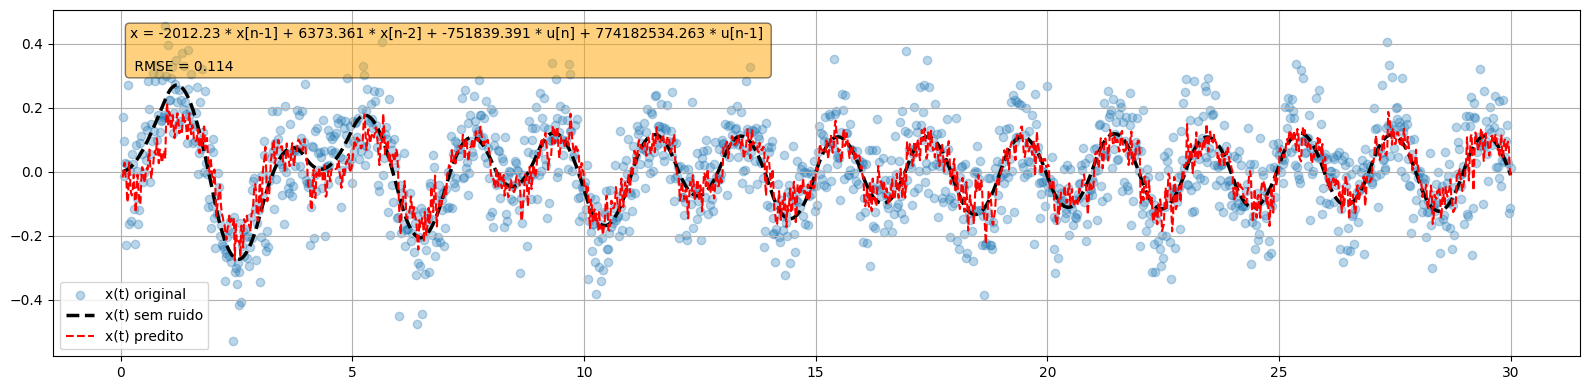

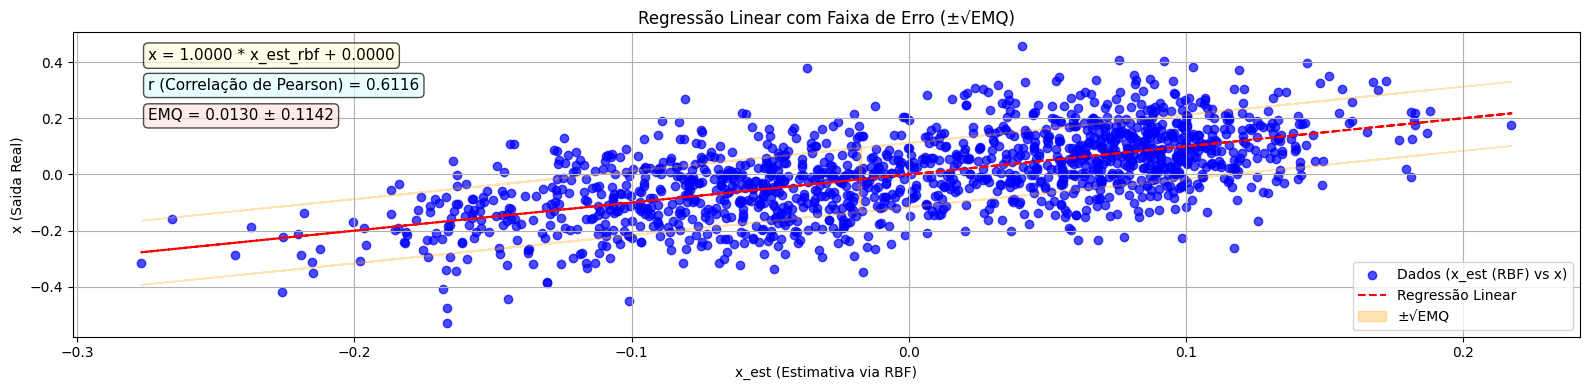

In [45]:
#Ajustando para x via RBF
#x[n] = w0 * g(x[n-1]) + w1 * g(x[n-2]) + w2 * g(u[n]) + w3 * g(u[n-1])

c = np.linspace(t[0], t[-1], 4)
s2 = 15

phi_X1 = np.exp(-((X1[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_X2 = np.exp(-((X2[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_u = np.exp(-((u[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_U1 = np.exp(-((U1[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))

X_RBF = np.column_stack((phi_X1, phi_X2, phi_u, phi_U1))

w = la.pinv(X_RBF) @ x

x_est_rbf = X_RBF @ w

EMQX_RBF = np.mean((x - x_est_rbf) ** 2)
RMSEX_RBF = np.sqrt(np.mean((x_est_rbf - x) ** 2))

modelo = (f"x = {w[0]:.2f} * x[n-1] + {w[1]:.3f} * x[n-2] + {w[2]:.3f} * u[n] + {w[3]:.3f} * u[n-1] \n\n RMSE = {RMSEX_RBF:.3f}")

plt.figure(figsize=(16,4))
plt.scatter(t, x, alpha = 0.3, label = "x(t) original")
plt.plot(t, x1[2:], '--k', lw = 2.5, label = "x(t) sem ruido")
plt.plot(t, x_est_rbf,'--r', label = "x(t) predito")
plt.grid()
plt.legend()
plt.gca().text(0.05, 0.95, modelo, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))

plt.tight_layout()
plt.show()
  
#Calculando correlacao de pearson

a, b, r_val, p_val, std_err = linregress(x_est_rbf, x)
corr_x_rbf, _ = pearsonr(x_est_rbf, x)
x_reg = a * x_est_rbf + b

plt.figure(figsize=(16, 4))
plt.scatter(x_est_rbf, x, alpha = 0.7, label = 'Dados (x_est (RBF) vs x)', color = 'blue')
plt.plot(x_est_rbf, x_reg, '--r', label = 'Regressão Linear')

plt.fill_between(x_est_rbf, x_reg - RMSEX_RBF, x_reg + RMSEX_RBF, color = 'orange', alpha = 0.3, label = '±√EMQ')

reg_eq = f"x = {a:.4f} * x_est_rbf + {b:.4f}"
corr_text = f"r (Correlação de Pearson) = {corr_x_rbf:.4f}"
emq_text = f"EMQ = {EMQX_RBF:.4f} ± {RMSEX_RBF:.4f}"

plt.text(0.05, 0.95, reg_eq, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightyellow', alpha = 0.7))

plt.text(0.05, 0.85, corr_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightcyan', alpha = 0.7))

plt.text(0.05, 0.75, emq_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'mistyrose', alpha = 0.7))

plt.xlabel("x_est (Estimativa via RBF)")
plt.ylabel("x (Saida Real)")
plt.title("Regressão Linear com Faixa de Erro (±√EMQ)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [50]:
print(f"EMQX_MMQ: {EMQX_MMQ}")
print(f"Coor x mmq: {corr_x_mmq}\n")

print(f"EMQY_MMQ: {EMQY_MMQ}")
print(f"Coor y mmq: {corr_y_mmq}\n")

print(f"EMQX_RBF: {EMQX_RBF}")
print(f"Coor x rbf: {corr_x_rbf}\n")

print(f"EMQY_RBF: {EMQY_RBF}")
print(f"Coor y rbf: {corr_y_rbf}")

EMQX_MMQ: 0.013108515322193752
Coor x mmq: 0.6087588313494797

EMQY_MMQ: 0.015454573645313845
Coor y mmq: 0.910645458880908

EMQX_RBF: 0.013034039291343787
Coor x rbf: 0.6116255793053164

EMQY_RBF: 0.015253853132985091
Coor y rbf: 0.9118617666450164


A partir da análise dos dados resultantes do treinamento, é possível perceber que tanto o EMQ quanto o Coeficiente de Correlação para as saídas x(t) e y(t) performaram melhor na utilização do método com Funções de Base Radial.